In [1]:
import torch
from ultralytics import YOLO
from util import compare_original_and_adversarial
from util import preprocess_image  # custom function
import torch.nn.functional as F
import numpy as np
from PIL import Image
from torchvision import transforms
from attacks import preprocess_init_patch, optimize_patch



In [ ]:
model = YOLO("yolov8n_road.pt")
image_path = "/home/fatma/GP/ADV_attacks_on_ML/yolo/YOLO/yolov8/export/images/1478901535246276321_jpg.rf.7wwfUE5MuA66g6ZKaY68.jpg"

# Adversarial Patch Attack

In [ ]:
PYTORCH_CUDA_ALLOC_CONF=True


# Define the target class (pedestrian)
TARGET_CLASS = 10
# Define the patch size
PATCH_SIZE = (60, 60)  # Width and height of the adversarial patch




# Generate an initial patch
initial_patch = preprocess_init_patch(PATCH_SIZE)  
# Optimize the patch
patched_image, optimized_patch = optimize_patch(image_path,initial_patch,TARGET_CLASS, raw_model_path="yolov8n_road.pt")



0: 640x640 4 cars, 133.5ms
Speed: 0.0ms preprocess, 133.5ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Iteration 0: location not found

0: 640x640 4 cars, 133.9ms
Speed: 0.1ms preprocess, 133.9ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
Iteration 1: location not found

0: 640x640 4 cars, 133.4ms
Speed: 0.0ms preprocess, 133.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)
Iteration 2: location not found

0: 640x640 4 cars, 133.7ms
Speed: 0.0ms preprocess, 133.7ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Iteration 3, Loss: 0.4999942183494568

0: 640x640 4 cars, 133.3ms
Speed: 0.0ms preprocess, 133.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)
Iteration 4, Loss: 0.49998629093170166

0: 640x640 4 cars, 133.4ms
Speed: 0.0ms preprocess, 133.4ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Iteration 5: location not found

0: 640x640 4 cars, 133.0ms
Speed: 0.0m

Running prediction on original tensor...



0: 640x640 4 cars, 132.8ms
Speed: 1.7ms preprocess, 132.8ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)
Running prediction on loaded adversarial tensor...

0: 640x640 4 cars, 1 truck, 133.8ms
Speed: 2.0ms preprocess, 133.8ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)


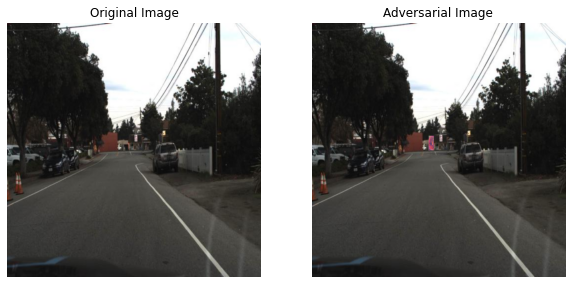

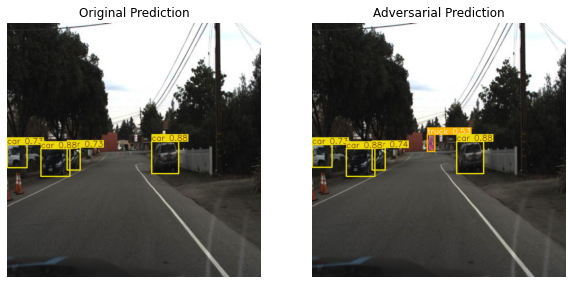

In [6]:
model = YOLO("yolov8n_road.pt")
compare_original_and_adversarial(model ,"/home/fatma/GP/ADV_attacks_on_ML/yolo/YOLO/yolov8/export/images/1478901535246276321_jpg.rf.7wwfUE5MuA66g6ZKaY68.jpg",patched_image ,0.5)

## Show prediction and Save adversarial images

Running prediction on loaded adversarial tensor...

0: 640x640 4 cars, 1 pedestrian, 140.2ms
Speed: 6.9ms preprocess, 140.2ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


(-0.5, 639.5, 639.5, -0.5)

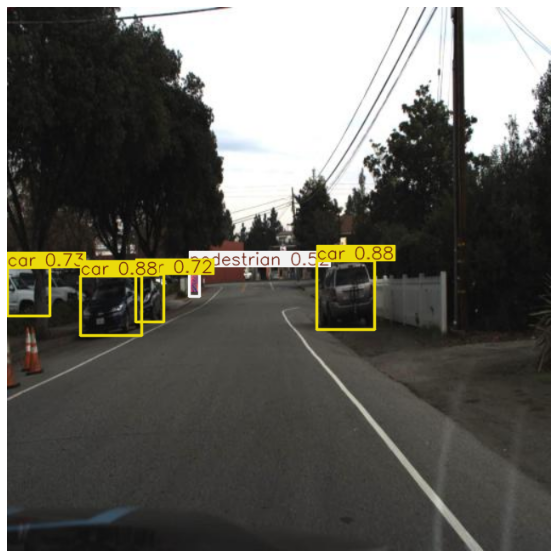

In [92]:
import tifffile
from util import save_tensor_image_tiff,load_tiff_image_as_tensor
from torchvision.utils import save_image
import matplotlib.pyplot as plt

# Save the adversarial image as a TIFF (preserving float32 precision)
adv_image_path = "Adversarial_patch_images/adv_image1.tiff"
adversarial_tensor = patched_image.clone().detach()  # ensure no gradient is attached
save_tensor_image_tiff(adversarial_tensor, adv_image_path)

# Now load the saved TIFF as a tensor to run prediction
loaded_adv_tensor = load_tiff_image_as_tensor(adv_image_path)

print("Running prediction on loaded adversarial tensor...")
adversarial_results = model(loaded_adv_tensor, conf=0.5)

# For display purposes, convert tensors to numpy arrays (scaling back to 0-255 for visualization)
adversarial_np = (adversarial_tensor.squeeze().permute(1, 2, 0).cpu().numpy() * 255).astype(np.uint8)

try:
    adversarial_pred_img = adversarial_results[0].plot()
except Exception as e:
    print("Error rendering adversarial predictions:", e)
    adversarial_pred_img = None

# Display raw images side by side
plt.figure(figsize=(20, 10))
plt.imshow(adversarial_pred_img)
plt.axis('off')
